In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools

In [209]:
data = pd.read_csv('Raw Dataset.CSV')
data.head()

,Additional File 3 : Trognon & Richard (2022) Dataset,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94
0,subject,group,gender,age,nsc,tr1,tr2,tr3,tr4,tr5,...,demo17,demo18,demo19,demo20,demo21,demo22,demo23,demo24,demo25,demo26
1,S01,1,0,35,1,5,6,5,3,6,...,4,4,1,2,4,3,1,2,4,3
2,S02,1,1,25,4,5,3,5,5,6,...,4,2,1,2,4,3,1,4,4,4
3,S03,1,1,18,2,5,5,6,5,5,...,4,4,1,2,4,3,1,2,4,3
4,S04,1,1,40,2,6,6,6,6,5,...,4,2,1,2,4,3,1,4,4,4


In [210]:
data.columns = data.iloc[0]  # Set the first row as column headers
data = data.drop(data.index[0])
data.head()

,subject,group,gender,age,nsc,tr1,tr2,tr3,tr4,tr5,...,demo17,demo18,demo19,demo20,demo21,demo22,demo23,demo24,demo25,demo26
1,S01,1,0,35,1,5,6,5,3,6,...,4,4,1,2,4,3,1,2,4,3
2,S02,1,1,25,4,5,3,5,5,6,...,4,2,1,2,4,3,1,4,4,4
3,S03,1,1,18,2,5,5,6,5,5,...,4,4,1,2,4,3,1,2,4,3
4,S04,1,1,40,2,6,6,6,6,5,...,4,2,1,2,4,3,1,4,4,4
5,S05,1,0,29,2,4,6,6,6,3,...,2,2,2,2,4,3,2,2,4,2


In [211]:
data.columns

Index(['subject', 'group', 'gender', 'age', 'nsc', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7', 'tr8', 'tr9', 'tr10', 'tr11', 'tr12', 'tr13',
       'tr14', 'tr15', 'tr16', 'tr17', 'tr18', 'tr19', 'tr20', 'tr21', 'tr22',
       'tr23', 'tr24', 'tr25', 'tr26', 'tr27', 'tr28', 'tr29', 'tr30', 'tr31',
       'tr32', 'tr33', 'tr34', 'tr35', 'tr36', 'tr37', 'tr38', 'tr39', 'tr40',
       'tr41', 'tr42', 'tr43', 'dass1', 'dass2', 'dass3', 'dass4', 'dass5',
       'dass6', 'dass7', 'dass8', 'dass9', 'dass10', 'dass11', 'dass12',
       'dass13', 'dass14', 'dass15', 'dass16', 'dass17', 'dass18', 'dass19',
       'dass20', 'dass21', 'demo1', 'demo2', 'demo3', 'demo4', 'demo5',
       'demo6', 'demo7', 'demo8', 'demo9', 'demo10', 'demo11', 'demo12',
       'demo13', 'demo14', 'demo15', 'demo16', 'demo17', 'demo18', 'demo19',
       'demo20', 'demo21', 'demo22', 'demo23', 'demo24', 'demo25', 'demo26'],
      dtype='object', name=0)

In [212]:
data = data.apply(pd.to_numeric, errors='coerce')

In [213]:
# Update labels for gender and group
data['gender'] = data['gender'].map({0: 'Female', 1: 'Male'})
data['group'] = data['group'].map({0: 'Control', 1: 'ADHD'})

In [214]:
# Descriptive statistics
age_stats = data['age'].describe()
gender_stats = data['gender'].value_counts()
group_stats = data['group'].value_counts()

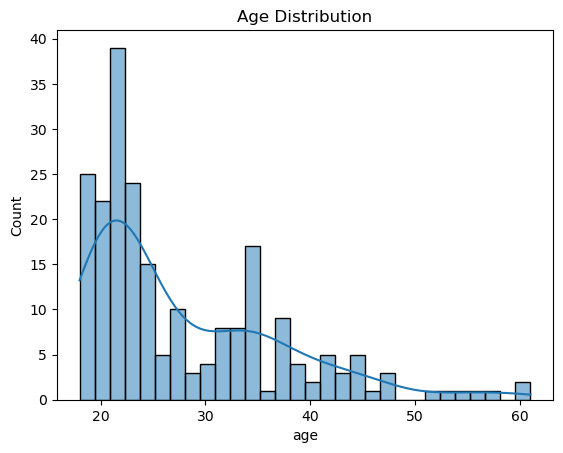

In [166]:
# EDA: Visualizations
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

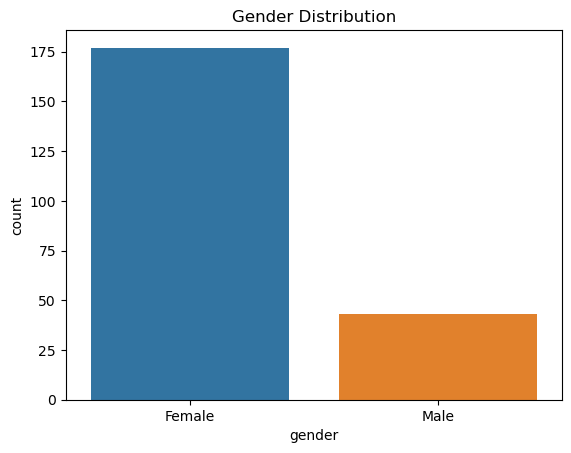

In [167]:
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.show()

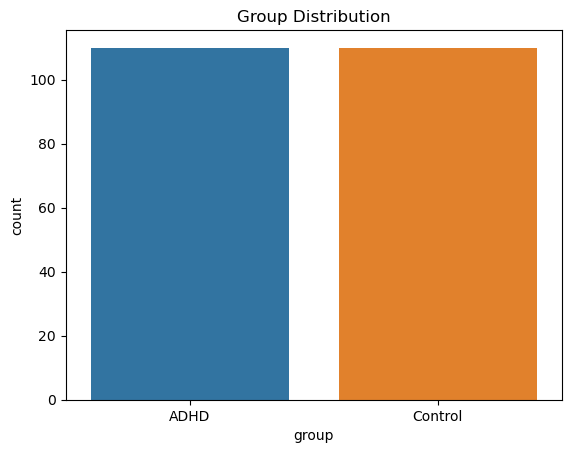

In [168]:
sns.countplot(x='group', data=data)
plt.title('Group Distribution')
plt.show()

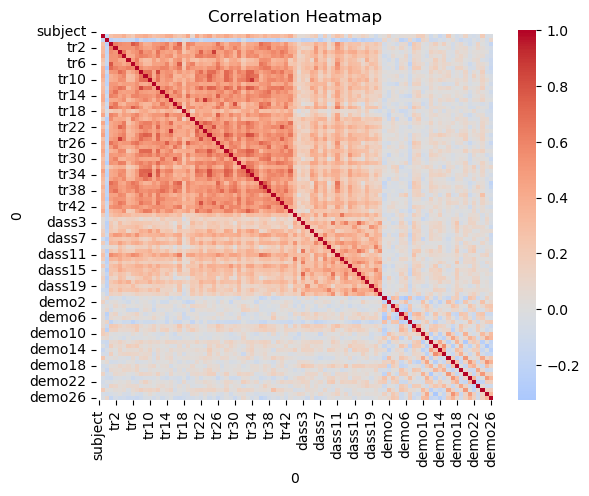

In [169]:
# Correlation analysis
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

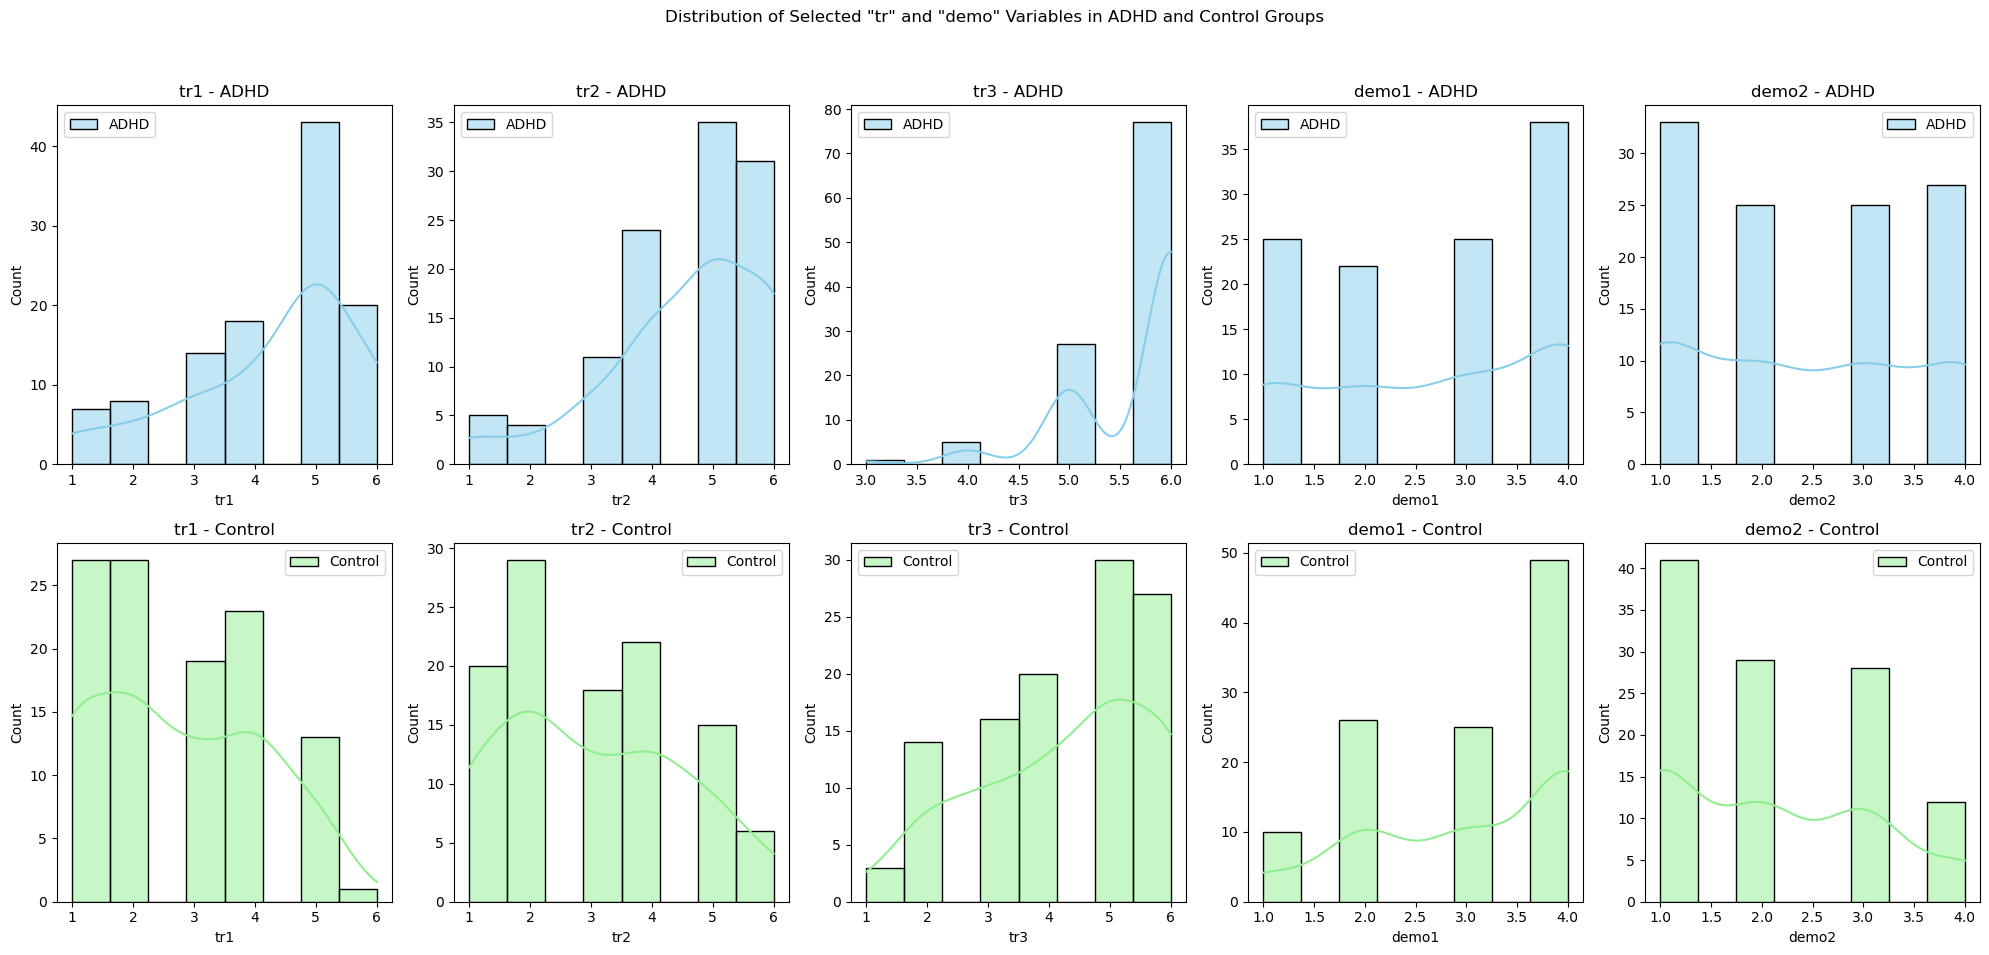

In [215]:
# Selecting a few "tr" and "demo" variables for analysis
selected_tr_demo = ['tr1', 'tr2', 'tr3', 'demo1', 'demo2']

# Plotting the distribution of selected variables for ADHD and Control groups
fig, axes = plt.subplots(2, len(selected_tr_demo), figsize=(20, 10))
fig.suptitle('Distribution of Selected "tr" and "demo" Variables in ADHD and Control Groups')

for i, col in enumerate(selected_tr_demo):
    # Plot for ADHD group
    sns.histplot(data[data['group'] == 'ADHD'][col], kde=True, ax=axes[0, i], color='skyblue', label='ADHD')
    axes[0, i].set_title(f'{col} - ADHD')
    axes[0, i].legend()
    
    # Plot for Control group
    sns.histplot(data[data['group'] == 'Control'][col], kde=True, ax=axes[1, i], color='lightgreen', label='Control')
    axes[1, i].set_title(f'{col} - Control')
    axes[1, i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [216]:
# Statistical analysis: Mann-Whitney U test
selected_variables = ['tr1', 'tr2', 'tr3', 'demo1', 'demo2']
for col in selected_variables:
    adhd_group = data[data['group'] == 'ADHD'][col].dropna()
    control_group = data[data['group'] == 'Control'][col].dropna()
    stat, p_value = mannwhitneyu(adhd_group, control_group)
    print(f'Mann-Whitney U test for {col}: Statistic={stat}, p-value={p_value}')

Mann-Whitney U test for tr1: Statistic=9426.0, p-value=3.369784606122669e-13
Mann-Whitney U test for tr2: Statistic=9392.5, p-value=6.090090900609058e-13
Mann-Whitney U test for tr3: Statistic=9506.5, p-value=4.977311357481218e-15
Mann-Whitney U test for demo1: Statistic=5092.5, p-value=0.03376998109791351
Mann-Whitney U test for demo2: Statistic=6972.0, p-value=0.04268253506114782


In [217]:

data['gender'] = data['gender'].map({'Female': 0, "Male": 1})
data['group'] = data['group'].map({'Control': 0, 'ADHD': 1})

In [268]:
# Feature selection and model preparation
predictive_vars = ['group', 'gender', 'age', 'nsc', 'tr1', 'tr2', 'tr3', 'tr4',
       'tr5', 'tr6', 'tr7', 'tr8', 'tr9', 'tr10', 'tr11', 'tr12', 'tr13',
       'tr14', 'tr15', 'tr16', 'tr17', 'tr18', 'tr19', 'tr20', 'tr21', 'tr22',
       'tr23', 'tr24', 'tr25', 'tr26', 'tr27', 'tr28', 'tr29', 'tr30', 'tr31',
       'tr32', 'tr33', 'tr34', 'tr35', 'tr36', 'tr37', 'tr38', 'tr39', 'tr40',
       'tr41', 'tr42', 'tr43', 'dass1', 'dass2', 'dass3', 'dass4', 'dass5',
       'dass6', 'dass7', 'dass8', 'dass9', 'dass10', 'dass11', 'dass12',
       'dass13', 'dass14', 'dass15', 'dass16', 'dass17', 'dass18', 'dass19',
       'dass20', 'dass21']
model_data = data[predictive_vars]
#model_data = model_data.fillna(model_data.median())  # Median imputation for missing values
#model_data = pd.get_dummies(model_data, columns=['gender'], drop_first=True)

In [269]:
model_data

,group,gender,age,nsc,tr1,tr2,tr3,tr4,tr5,tr6,...,dass12,dass13,dass14,dass15,dass16,dass17,dass18,dass19,dass20,dass21
1,1,0,35.0,1,5,6,5,3,6,4,...,3,3,3,1,1,2,2,1,1,2
2,1,1,25.0,4,5,3,5,5,6,4,...,0,0,0,0,0,0,2,0,0,0
3,1,1,18.0,2,5,5,6,5,5,6,...,3,2,3,2,2,1,3,2,2,2
4,1,1,40.0,2,6,6,6,6,5,6,...,2,1,1,0,0,1,1,1,1,3
5,1,0,29.0,2,4,6,6,6,3,6,...,3,3,2,2,2,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0,0,24.0,3,2,1,2,5,1,1,...,1,1,0,0,0,1,1,2,0,0
217,0,0,21.0,3,2,2,3,3,2,1,...,1,1,0,0,0,0,1,1,0,0
218,0,1,23.0,3,3,2,4,6,3,5,...,2,1,1,1,1,0,0,3,0,0
219,0,0,21.0,3,1,1,2,2,1,2,...,0,0,0,0,0,1,1,1,1,0


In [270]:
# Splitting the dataset
X = model_data.drop(['group'], axis=1)
y = model_data['group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

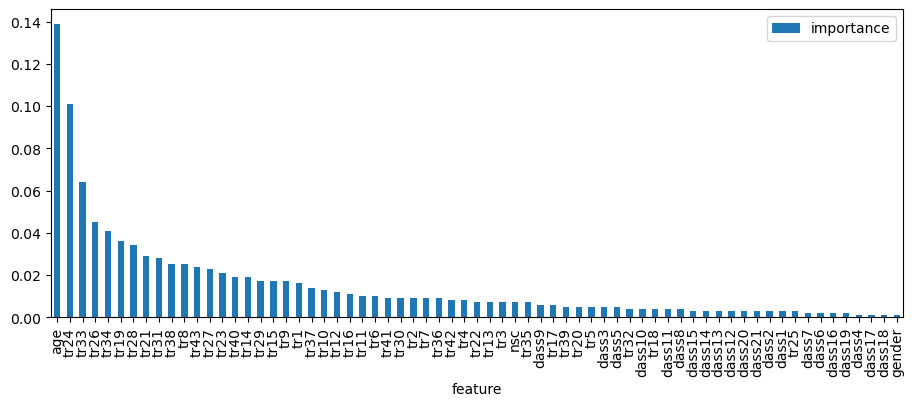

In [271]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [272]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
import itertools

rfc = RandomForestClassifier()

# create the RFE model and select 20 attributes
rfe = RFE(rfc, n_features_to_select=20)


rfe = rfe.fit(X_train, y_train)



In [273]:


# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]



print(selected_features)

a = [i[0] for i in feature_map]
X_train = X_train.iloc[:,a]
X_test = X_test.iloc[:,a]

['age', 'tr1', 'tr2', 'tr8', 'tr12', 'tr14', 'tr15', 'tr19', 'tr21', 'tr23', 'tr24', 'tr26', 'tr27', 'tr28', 'tr29', 'tr33', 'tr34', 'tr37', 'tr38', 'tr40']


In [274]:
# Initializing the machine learning models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svm_model = SVC(probability=True)

In [275]:
# Training and evaluating the models
models = {'Logistic Regression': logistic_model, 'Random Forest': random_forest_model, 'SVM': svm_model}
model_performance = {}

In [276]:
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    model_performance[name] = {'CV Accuracy': cv_scores.mean()}


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [277]:
# Model building
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

In [278]:
import joblib

In [279]:
# Model evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f'{name} - Accuracy: {accuracy_score(y_test, y_pred)}')
     # Training the model
    model.fit(X_train, y_train)
    
    # Predicting on the test set
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_prob)
    # Save the trained model using joblib
    joblib.dump(model, f'{name}_model.joblib')
    model_performance[name].update({'Test Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'AUC-ROC': auc_roc})

Logistic Regression - Accuracy: 0.9318181818181818
Random Forest - Accuracy: 0.7954545454545454
SVM - Accuracy: 0.8863636363636364


In [280]:
# Convert results to a DataFrame for better visualization
model_performance_df = pd.DataFrame(model_performance).T
model_performance_df

,CV Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC-ROC
Logistic Regression,0.914603,0.931818,0.913043,0.954545,0.933333,0.975207
Random Forest,0.925873,0.840909,0.800000,0.909091,0.851064,0.913223
SVM,0.931587,0.886364,0.840000,0.954545,0.893617,0.956612


In [281]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

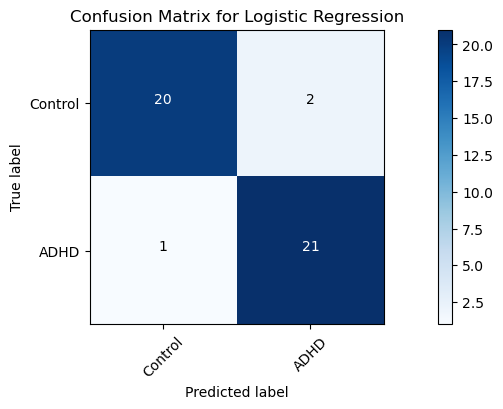

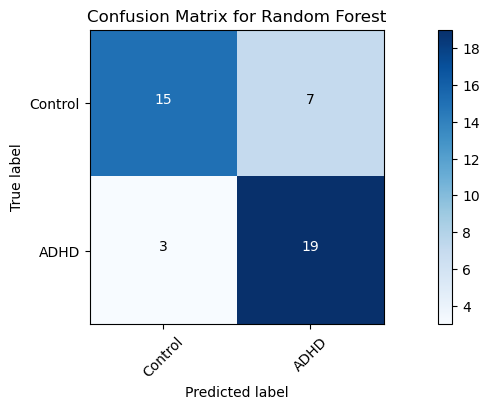

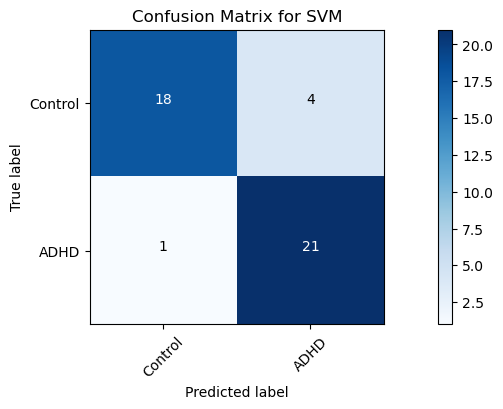

In [282]:
# Model evaluation with confusion matrix
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=['Control', 'ADHD'], title=f'Confusion Matrix for {name}')
    plt.show()


In [283]:
random_forest_model.fit(X_train, y_train).feature_importances_

array([0.19736294, 0.02128643, 0.01670993, 0.0356632 , 0.02371225,
       0.03465794, 0.02940925, 0.03197988, 0.07627868, 0.02558558,
       0.11306169, 0.04508222, 0.04398322, 0.05408476, 0.02635024,
       0.11893896, 0.02674658, 0.0210975 , 0.02573046, 0.03227829])

In [284]:
X_train.columns

Index(['age', 'tr1', 'tr2', 'tr8', 'tr12', 'tr14', 'tr15', 'tr19', 'tr21',
       'tr23', 'tr24', 'tr26', 'tr27', 'tr28', 'tr29', 'tr33', 'tr34', 'tr37',
       'tr38', 'tr40'],
      dtype='object', name=0)

In [ ]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model
model = joblib.load('Logistic Regression_model.joblib')

# Key for scale of measurement
key = {0:'select what appply',
    1: 'Doesn\'t look like me at all.',
    2: 'Looks somewhat unlike me.',
    3: 'Looks a little unlike me.',
    4: 'Looks somewhat like me.',
    5: 'Looks quite a bit like me.',
    6: 'Looks just like me.'
}
def predict_adhd(features):
    # Convert features to numpy array
    features_np = np.array(features).reshape(1, -1)
    # Make prediction
    prediction = model.predict(features_np)
    return prediction[0]

# Streamlit UI
def main():
    st.title('ADHD Prediction App')
    st.sidebar.header('User Input Features')

    # Collect user input features
    age = st.sidebar.slider('Age', 1, 100, 25, 1)

    tr1 = st.sidebar.selectbox('I don\'t pay attention to details', list(key.values()), 0)
    tr2 = st.sidebar.selectbox('Accused of inaccuracies in work', list(key.values()), 0)
    tr8 = st.sidebar.selectbox('Mind often elsewhere', list(key.values()), 0)
    tr12 = st.sidebar.selectbox('Difficulty organizing time', list(key.values()), 0)
    tr14 = st.sidebar.selectbox('Difficulty organizing tasks with several steps', list(key.values()), 0)
    tr15 = st.sidebar.selectbox('Avoid tasks requiring sustained mental effort', list(key.values()), 0)
    tr19 = st.sidebar.selectbox('Lose things needed for work', list(key.values()), 0)
    tr21 = st.sidebar.selectbox('Easily distracted by environment', list(key.values()), 0)
    tr23 = st.sidebar.selectbox('Easily distracted by surroundings', list(key.values()), 0)
    tr24 = st.sidebar.selectbox('Subject to forgetfulness in daily life', list(key.values()), 0)
    tr26 = st.sidebar.selectbox('Wiggle hands or feet on seat', list(key.values()), 0)
    tr27 = st.sidebar.selectbox('Trouble sitting still', list(key.values()), 0)
    tr28 = st.sidebar.selectbox('Leave seat unnecessarily during a meeting', list(key.values()), 0)
    tr29 = st.sidebar.selectbox('Leave seat unnecessarily at work', list(key.values()), 0)
    tr33 = st.sidebar.selectbox('Hard to stay in place when demanded', list(key.values()), 0)
    tr34 = st.sidebar.selectbox('Entourage finds you difficult to follow', list(key.values()), 0)
    tr37 = st.sidebar.selectbox('Tend to monopolize conversations', list(key.values()), 0)
    tr38 = st.sidebar.selectbox('Finish other people\'s sentences', list(key.values()), 0)
    tr40 = st.sidebar.selectbox('Difficult to wait turn in a conversation', list(key.values()), 0)

    # Map selected values back to the corresponding keys
    tr1 = next((k for k, v in key.items() if v == tr1), None)
    tr2 = next((k for k, v in key.items() if v == tr2), None)
    tr8 = next((k for k, v in key.items() if v == tr8), None)
    tr12 = next((k for k, v in key.items() if v == tr12), None)
    tr14 = next((k for k, v in key.items() if v == tr14), None)
    tr15 = next((k for k, v in key.items() if v == tr15), None)
    tr19 = next((k for k, v in key.items() if v == tr19), None)
    tr21 = next((k for k, v in key.items() if v == tr21), None)
    tr23 = next((k for k, v in key.items() if v == tr23), None)
    tr24 = next((k for k, v in key.items() if v == tr24), None)
    tr26 = next((k for k, v in key.items() if v == tr26), None)
    tr27 = next((k for k, v in key.items() if v == tr27), None)
    tr28 = next((k for k, v in key.items() if v == tr28), None)
    tr29 = next((k for k, v in key.items() if v == tr29), None)
    tr33 = next((k for k, v in key.items() if v == tr33), None)
    tr34 = next((k for k, v in key.items() if v == tr34), None)
    tr37 = next((k for k, v in key.items() if v == tr37), None)
    tr38 = next((k for k, v in key.items() if v == tr38), None)
    tr40 = next((k for k, v in key.items() if v == tr40), None)

    input_features = [age, tr1, tr2, tr8, tr12, tr14, tr15, tr19, tr21, tr23, tr24, tr26, tr27, tr28, tr29, tr33, tr34, tr37, tr38, tr40]

    # Add an explanation section for influential features
    if st.button('Predict'):
        result = predict_adhd(input_features)
        confidence = model.predict_proba(np.array(input_features).reshape(1, -1)).max()

        if result == 0:
            st.success(f"The model predicts that the individual does not have ADHD with {confidence * 100:.2f}% confidence.")
            st.image('https://media.giphy.com/media/l0HlJOM2XSY3hh0PS/giphy.gif', use_column_width=True)
            st.write("Congratulations! You are on the right track.")
        else:
            st.warning(f"The model predicts that the individual has ADHD with {confidence * 100:.2f}% confidence.")
            st.image('https://media.giphy.com/media/l378azvAw1c9RAJ2I/giphy.gif', use_column_width=True)
            st.write("It's okay! Many successful people have ADHD. Embrace your uniqueness!")

        # Display input feature visualization
        st.subheader('Input Feature Visualization')
        input_features_names = ['Age', 'tr1', 'tr2', 'tr8', 'tr12', 'tr14', 'tr15', 'tr19', 'tr21', 'tr23', 'tr24',
                                 'tr26', 'tr27', 'tr28', 'tr29', 'tr33', 'tr34', 'tr37', 'tr38', 'tr40']
        st.bar_chart(dict(zip(input_features_names, input_features)))

        # Display an explanation for influential features using coefficients
        st.subheader('Influential Features (Logistic Regression Coefficients)')
        coefficients = model.coef_[0]
        st.bar_chart(dict(zip(input_features_names, coefficients)))


if __name__ == '__main__':
    main()


In [ ]:
this is X_train.columns (['age', 'tr1', 'tr2', 'tr8', 'tr12', 'tr14', 'tr15', 'tr19', 'tr21',
       'tr23', 'tr24', 'tr26', 'tr27', 'tr28', 'tr29', 'tr33', 'tr34', 'tr37',
       'tr38', 'tr40'], 

In [135]:
import tkinter as tk
from tkinter import messagebox

In [136]:
def predict_adhd():
    # Here, you can collect input from the GUI
    # For demonstration purposes, using dummy data for prediction
    dummy_data = pd.DataFrame([[5, 3]], columns=['feature1', 'feature2'])
    
    # Making a prediction using one of the models
    prediction = logistic_model.predict(dummy_data)
    
    # Displaying the prediction result
    messagebox.showinfo("Prediction Result", f"The predicted class is: {prediction[0]}")

In [83]:
# Setting up the GUI
root = tk.Tk()
root.title("ADHD Diagnosis Prediction")

predict_button = tk.Button(root, text="Predict ADHD", command=predict_adhd)
predict_button.pack()

root.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Temp\ipykernel_19688\1907648525.py", line 7, in predict_adhd
    prediction = logistic_model.predict(dummy_data)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_base.py", line 451, in predict
    scores = self.decision_function(X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_base.py", line 429, in decision_function
    check_is_fitted(self)
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py", line 1461, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This LogisticRe